# Homeworks

## Starting from the GPT section you will see some lines with a #Complete comment. You must complete them. Deadline: Tuesday, January 30.

# Tutorial walkthrough
> Tutorial walkthrough with annotations.

# Unsupervised learning

Unsupervised learning consists on capturing rich patterns in the data in a label-free approach. This is opposed to the typical supervised learning scheme, in which we have a data set comprised of labeled samples $\left\{\mathbf{x}, y\right\}$ and we try to approximate the function $f(x)\approx y(x)$.

::: {callout-note}
In unsupervised learning, even though we follow label-free approaches, what we would consider labels can some times be part of the data corpus.
:::

We can split deep unsupervised learning in two main categories: generative and self-superivsed learning, although the line is often blurred.
In generative learning, we try to recreate the data distribution. This allows us to generate new data points that are likely to belong to the original data set, and often even know the probability to observe them.
In self-supervised learning, we instead focus on finding different representations of the data. These are often useful to accomplish other tasks, compress the information, etc.

Indeed, in some cases, the resulting models can accomplish downstream tasks without having been trained to perform them explicitly. For example, the generative model [GPT-3](https://proceedings.neurips.cc/paper/2020/hash/1457c0d6bfcb4967418bfb8ac142f64a-Abstract.html) is a language model that can perform question answering tasks (among others) without any further specific training for it. Or the self-supervised vision model [DINO](https://openaccess.thecvf.com/content/ICCV2021/html/Caron_Emerging_Properties_in_Self-Supervised_Vision_Transformers_ICCV_2021_paper.html) can extract segmentation masks from images (see @fig-dino or [this video](https://youtu.be/8I1RelnsgMw)).

::: {#fig-dino}
![](figures/dino.png)

Self-supervised segmentation masks from DINO.
:::

Unsupervised methods have gathered a lot of attention in scientific applications, as they can help us extract physically relevant information from experimental data, as in [this great work](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.124.010508). Actually, in science, some times we do not even know what to look for in the data! For example, supose that we want to characterize a complex quantum system. To do so, we need to consider all the possible phases the system can be and devise appropiate order parameters to test whether they exist and find the phase transitions. With self-supervised methods, we can find different data representation schemes for specific regions of the phase diagram. This way, we can explore the phase diagram autonomously to find where the phase transitions may be in our system, as shown in [this work](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.170603).

Most of the recent advances in the machine learning (ML) field have been mainly due to massive scaling, both in terms of the model size and the amount of data. This has relied heavily in the vast amount of unlabeled data that exists in the internet. Think about it, for every cat image in every appropiately labeled data set we can find, how many unlabeled cat images and videos are in the internet? **The current state-of-the-art practice in many ML applications consists on training an unsupervised model with huge amounts of unlabeled data and, then, leveraging its knowledge to accomplish the desired task**.

This process is akin to the way humans learn. Our brain processes a continuous stream of unlabeled data containing rich information about our environment. Furthermore, we never process the exact same information twice, as there are no two instances of our life that are exactly the same. This allows us to generalize extremely well and make the most out of the relatively scarse labeled data we have access to. For example, given a single [stegosaurus](https://en.wikipedia.org/wiki/Stegosaurus) image, we can immediately recognize this dinosaur species anywhere else, with any camera angle, any art-style, and even with partial information (e.g. just a part of the dinosaur).

Thus, unsupervised learning is essential for the entire ML field and it is specially promising in scientific applications.

## Generative modeling

In this tutorial, we focus on generative learning. As we have briefly mentioned before, it consists on learning the data distribution to generate new samples. This is extremely powerful both on its own, since high-quality new samples can be very valuable, and in combination with other tools to tackle downstream tasks.

There are many data generation approaches that we can consider. The most straightforward one is to simply generate samples that are similar to the traning ones, such as face images or digits (e.g., [this cat](https://thiscatdoesnotexist.com/)). We can also have conditioned synthesis, such as generating an audio signal from a text prompt that can be conditioned to a specific speaker voice (e.g. [WaveNet](https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio)).
This involves all sorts of translation tasks, where we write text from a sample fragment, generate a new image from a reference one (see the emblematic [horse-to-zebra](https://openaccess.thecvf.com/content_iccv_2017/html/Zhu_Unpaired_Image-To-Image_Translation_ICCV_2017_paper.html) example), or even [create a video from a text fragment](https://makeavideo.studio/)!

::: {.callout-note}
This is a very broad field and here we just show a hand full of representative examples.
:::

# Language models

Language models are generative models that write text as us (humans) would do it. Current advances in language modeling, such as [ChatGPT](https://openai.com/blog/chatgpt/), are definitely on par with humans (honestly, we set the bar quite low). See this cool example in @fig-chatgpt:

::: {#fig-chatgpt}
![](figures/chatgpt_impressive.png)

Sample conversation with ChatGPT. 
:::

The most common approach to generate sequential data, is to recursively predict the following item. In the case of language modeling, we could take a piece of text as starting point and use our model to predict the next word. Appending the predicted word to the existing text, and feeding it to the model again, we could predict the following word. Following this procedure, we could write any arbitrary amount of text!

::: {.callout-note}
While the procedure may seem simple, language is very complex and writing coherent text is quite a challenge. Even though we may write text sequentially, the relationships between elements within the text can be intrincate with forward and backwards dependencies that can be an entire book apart.
:::

There are several considerations we need to take into account. For example, how to "process text" with a machine learning model that operates purely with mathematical operations.

## Example task

The goal of this tutorial is to train a GPT-like model to count numbers: "1,2,3,4,...,8765,8766,8767,...". This seems like a rather simple task that could be easily achieved numerically with a single line of code. However, we will consider the digits as strings that conform sentences.

This toy example will allow us to understand the main concepts behind language models. We will use it as a running example and implement the main ideas as we see them.

Here, we will build our data set, which is nothing more than a text document containing the numbers.

In [3]:
max_num = 1_000_000
text = ",".join([str(i) for i in range(max_num)])

Let's see the first and last few digits of our data set.

In [4]:
#| code-fold: true
print(text[:20])
print(text[-20:])

0,1,2,3,4,5,6,7,8,9,
999997,999998,999999


## Giving numerical meaning to text

We can communicate very deep concepts with words, but how does a machine *understand* them?

When we work with text, we split it into elementary pieces called **tokens**. This is known as tokenization and there is quite a lot of freedom on how to do it. For example, we can take from full sentences, to words, to single characters. The most common practice is to use sub-word tokens that are between single characters to full words, such as [SentencePiece](https://github.com/google/sentencepiece). We can also have special tokens to account for additional grammatical information. For example, we can use special tokens to indicate the beggining and ending of a sequence, or to indicate that the words start with capital letters.

Let's see a simple tokenization example. We would take the following sentence:
```
My cat won't stop purring.
```
And transform it into the tokens:
```
<BoS><x_maj><my> <cat> <wo><n't> <stop> <purr><ing><.><EoS>
```

::: {.callout-note}
I just made up this tokenization, this is just to provide an idea.
:::

With this, we define a *vocabulary* of tokens. To provide them with "meaning", we assign a trainable parameter vector to each of them, which are known as **embedding vectors**. The larger the embedding, the richer the information we can associate to every individual token. We typically store these vectors in a so-called **embedding matrix**, where every row provides the associated embedding vector to a token. This way, we identify the tokens by an integer index that corresponds to their row in the embedding matrix.

Taking long tokens results into large vocabularies and, therefore, we need more memory. However, we can generate a piece of text with just a few inference steps. Conversely, short tokens require much less memory at the cost of more inference steps to write. Thus, this presents a trade-off between memory and computational time. You can get some intuition about it by comparing the number of letters in the alphabet (shortest possible tokens) with the number of entries in a dictionary (every word is a token).

To process a piece of text, we first split it into the tokens of our vocabulary (tokenization), and replace the tokens by their corresponding indices (numericalization). 

Let's see how this works in our example task. First of all, we build the token vocabulary. In this simple case, every digit is a token together with the separator ",". 

In [5]:
vocab = sorted(list(set(text))) #we are getting the set of unique characters in the text then we get a sorted list out of it
vocab_size = len(vocab)
print(vocab)
print(vocab_size) #11 tokens

[',', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
11


Now we can build a `Tokenizer` class to encode raw text into tokens, and decode tokens to actual text.

In [6]:
class Tokenizer: #convert the text to a list of integers
    def __init__(self, vocab): #create a dictionary that maps each character to an integer
        self.s2i = {char: i for i, char in enumerate(vocab)}  #chars to ints
        self.i2s = {i: char for char, i in self.s2i.items()}  #ints to chars
    
    def encode(self, string):
        "Tokenize an input string"
        return [self.s2i[char] for char in string]
    
    def decode(self, ints):
        "Transform a list of integers to a string of characters"
        return ''.join([self.i2s[i] for i in ints])

In [7]:
tkn = Tokenizer(vocab)

Let's see the map from tokens to integer.

In [8]:
tkn.s2i

{',': 0,
 '0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10}

In [9]:
tkn.i2s

{0: ',',
 1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9'}

We can try our tokenizer with a text example.

In [10]:
pre_tkn = text[:10]
pre_tkn, tkn.encode(pre_tkn)

('0,1,2,3,4,', [1, 0, 2, 0, 3, 0, 4, 0, 5, 0])

We can also test the decoding function by encoding and decoding.

In [11]:
tkn.decode(tkn.encode(pre_tkn))

'0,1,2,3,4,'

::: {.callout-note}
Here we only perform the text pre-processing. The embedding belongs to the machine learning model.
:::

## Learning the data probability distribution

To learn how to generate text, we need to learn the underlying distribution of the data we wish to replicate $p_{\text{data}}(\mathbf{x})$. We model text as a sequence of tokens $\mathbf{x}=\left[x_1, x_2, \dots, x_{T-1}\right]$, and the goal is to predict the next token $x_T$. This way, we can recursively generate text: 

1. We start with some initial context $x_1, x_2, \dots, x_{T-1}$.
2. We predict the next token $x_T$, given the context.
3. We append the prediction to the existing text and repeat the process taking $x_1,\dots,x_T$ as context.

We typically do this defining a parametrized model to approximate the probability distribution, $p_\theta(\mathbf{x})\approx p_{\text{data}}(\mathbf{x})$. The parameters $\theta$ can represent from the weights of a neural network, to the coefficients of a gaussian mixture model.

A standard technique in the machine learning field is to use the chain rule of probability to model sequential data. This way, the probability to observe a sequence of tokens can be described as 
$$p_{\theta}(\mathbf{x})=p_\theta(x_1)\prod_{t=2}^{T}p_\theta(x_t|x_1\dots x_{t-1})\,.$$

We optimize our model parameters to obtain the **maximum likelihood estimator**, which is the most statistically efficient estimator. In this tutorial, we do not want to dive too deep in the details. The main intuition behind it is that we try to maximize the likelihood of observing the training data under our parametrized model. As such, we wish to minimize the negative log-likelihood loss or cross-entropy loss:
$$\theta^* = \text{arg}\,\text{min}_\theta - \frac{1}{N}\sum_{i=1}^N \log p_\theta\left(\mathbf{x}^{(i)}\right) = \text{arg}\,\text{min}_\theta - \frac{1}{N}\sum_{i=1}^N\sum_{t=1}^T \log p_\theta\left(x_t^{(i)}|x_{<t}^{(i)}\right)$$

We can understand the task as a classification problem at every time-step where the goal is to predict the token that follows. Thus, we can build our self-supervised classification task by simply taking the text shifted by one position as target for our prediction. For example, consider the tokenized sentence
```
<this> <language> <model> <rocks><!>
```
Given the tokens
```
<this> <language>
```
we wish to predict 
```
<model>
```
among all the tokens in the vocabulary.

As we typically do in machine learning, we find the optimal parameters $\theta^*$, i.e., train our model, with gradient-based optimization.

# Baseline: bigram language model

Let's create a very simple baseline language model. This will allow us to see how the embedding matrix works and the training loop details in pytorch.

In [12]:
#| hide
import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(7)
device = "cuda" if torch.cuda.is_available() else "cpu"

## Data processing

First of all, we need to properly arrange our data. We will start by tokenizing the whole text piece.

In [13]:
data = torch.tensor(tkn.encode(text))
data[:20]

tensor([ 1,  0,  2,  0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,  0,  9,  0,
        10,  0])

In [14]:
data.shape

torch.Size([6888889])

Now we need to save a part of the data for validation and keep the rest for training. In generative models, we do not tend to use too much data for validation because it is just to get a rough idea of how it is working. In the end, we will evaluate the performance ourselves asking the model to generate samples.

To keep this simple, we will save the last numbers as validation data.

::: {.callout-note}
Given the nature of our data, it would be best to save chunks of the data sampled at different points along the whole text piece.
:::

In [15]:
val_pct = 0.1
split_idx = int(len(data)*val_pct)
data_train = data[:-split_idx] #it would be better tu cut it when some number ends
data_val = data[-split_idx:]

In [16]:
data_train.shape, data_val.shape

(torch.Size([6200001]), torch.Size([688888]))

To train machine learning models, we take advantage of parallelization to process several samples at once. To do so, we will split the text in sub-sequences from which we will build our training batches.

In [17]:
def get_batch(data, batch_size, seq_len):
    idx = torch.randint(len(data)-seq_len, (batch_size,)) #(bs)
    x = torch.stack([data[i:i+seq_len] for i in idx]) #(bs, seq_len)
    y = torch.stack([data[i:i+seq_len] for i in idx+1])
    return x.to(device), y.to(device)

In [18]:
batch_size = 64 #independent sequences will be processed in parallel
seq_len = 8 # maximum length of the sequences
xb, yb = get_batch(data_train, batch_size, seq_len)

In [19]:
xb.shape

torch.Size([64, 8])

In [20]:
xb[0], yb[0]

(tensor([ 3,  0,  8,  8, 10,  1,  2,  4]),
 tensor([ 0,  8,  8, 10,  1,  2,  4,  0]))

## Model definition

We will make a bigram model that predicts the following character based on the previous one. These models are stochastic and, therefore, the output of the model is a probability distribution over our vocabulary. We can easily achieve this by making the embedding size as large as the vocabulary. This way, when we index into the embedding matrix with a token, we immediately obtain the probability distribution over the possible next tokens.

In [21]:
class BigramLanguageModel(nn.Module):
    "Language model that predicts text based on the previous character."
    def __init__(self, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, vocab_size) #each row is the vectorial representation of each one of the vocabulary elements ordered
        
    def forward(self, x):
        logits = self.embedding(x) #each row is the vectorial representation of each one of the vocabulary elements ordered
        return logits
        
    @torch.no_grad()
    def generate(self, x, new_tkn): #x is the context and new_tkn is the number of new tokens that we want
        for _ in range(new_tkn):
            # x has dimensions (batch, seq_len)
            logits = self(x) # (batch, seq_len, vocab_size)
            logits = logits[:, -1, :] # (batch, vocab_size)
            probs = F.softmax(logits, dim=-1) # (batch, vocab_size)
            new_tkn = torch.multinomial(probs, 1)
            x = torch.cat((x, new_tkn), dim=1)
        return x

In [22]:
bigram_model = BigramLanguageModel(vocab_size).to(device)

In [23]:
xb.shape, bigram_model(xb).shape #each row is the embedding of each token of xb

(torch.Size([64, 8]), torch.Size([64, 8, 11]))

In [24]:
next(bigram_model.embedding.parameters()) #each row is the vectorial representation of each one of the vocabulary elements ordered

Parameter containing:
tensor([[ 0.1332,  0.1825, -0.5146,  0.8005, -1.2432, -1.7178, -0.5824, -0.6153,
         -0.8858,  1.1970,  0.4675],
        [-0.1439, -0.8120, -0.3866, -1.0370,  0.5920, -2.2578,  0.4043,  0.5722,
          0.3078, -0.1259, -0.9578],
        [ 1.7518,  0.9796, -0.3985, -0.1732,  0.7569,  0.9862, -0.8253,  0.1633,
          0.5013,  1.4206, -0.5368],
        [ 0.8289,  1.0571, -1.1047,  0.1274, -0.0189, -0.4073,  0.5317,  0.3836,
          1.9126, -1.2145,  1.7711],
        [ 0.5071, -0.1576,  0.4603, -1.1532, -1.1247, -0.3144,  0.6260,  0.0908,
         -0.5860, -0.4896,  0.6398],
        [ 0.6094, -0.8160,  1.1565, -1.2107,  0.5071, -0.4311,  0.6133,  0.2830,
          1.1855,  0.5689,  0.1333],
        [ 0.5600, -0.7351, -0.2240, -0.7955, -2.1339, -0.7493,  1.4535, -1.5414,
         -0.3315,  0.5505,  0.1268],
        [-1.5152, -0.9127,  1.2716,  0.2615, -0.1494,  1.1523, -1.1309,  2.0875,
         -0.5307,  0.8043,  0.0739],
        [ 0.0676, -0.5489, -0.4120

In [25]:
next(bigram_model.embedding.parameters()).softmax(-1).sum(-1) #softmax normalizes the rows

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000], grad_fn=<SumBackward1>)

In [26]:
xb[0]

tensor([ 3,  0,  8,  8, 10,  1,  2,  4])

In [27]:
bigram_model(xb)[0] #each row is the embedding of each token of xb[0]

tensor([[ 0.8289,  1.0571, -1.1047,  0.1274, -0.0189, -0.4073,  0.5317,  0.3836,
          1.9126, -1.2145,  1.7711],
        [ 0.1332,  0.1825, -0.5146,  0.8005, -1.2432, -1.7178, -0.5824, -0.6153,
         -0.8858,  1.1970,  0.4675],
        [ 0.0676, -0.5489, -0.4120,  0.0539,  0.7235, -1.0836, -0.5302,  0.1326,
          0.6821, -1.0268, -0.0790],
        [ 0.0676, -0.5489, -0.4120,  0.0539,  0.7235, -1.0836, -0.5302,  0.1326,
          0.6821, -1.0268, -0.0790],
        [-1.1399,  3.7882, -0.3576,  0.1079, -0.4034,  0.4705, -1.5714,  0.8536,
         -1.3701,  0.9714, -2.6343],
        [-0.1439, -0.8120, -0.3866, -1.0370,  0.5920, -2.2578,  0.4043,  0.5722,
          0.3078, -0.1259, -0.9578],
        [ 1.7518,  0.9796, -0.3985, -0.1732,  0.7569,  0.9862, -0.8253,  0.1633,
          0.5013,  1.4206, -0.5368],
        [ 0.5071, -0.1576,  0.4603, -1.1532, -1.1247, -0.3144,  0.6260,  0.0908,
         -0.5860, -0.4896,  0.6398]], grad_fn=<SelectBackward0>)

::: {.callout-note}
The `logits` we define here are the unnormalized probability scores for each token. To transform them in a normalized probability distribution, we use a [SoftMax](https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax) function. We will see below that pytorch takes the logits directly to compute the loss function instead of the probabilities.
:::

Let's try generating some text with our model.

In [28]:
context = torch.zeros((1, 1), dtype=torch.long).to(device) #we start generating giving to the model a comma (index 0). Of course you can start generating with any other token (index of it).
tkn.decode(bigram_model.generate(context, 20)[0].tolist())

',,0662770908680514,27'

In [29]:
#the same as before but with a batch of 3
context = torch.zeros((3, 1), dtype=torch.long).to(device)
print(tkn.decode(bigram_model.generate(context, 20)[0].tolist()))
print(tkn.decode(bigram_model.generate(context, 20)[1].tolist()))
print(tkn.decode(bigram_model.generate(context, 20)[2].tolist()))

,017351,906455162,1,8
,8648866666666659031,
,982084751,2,86282,13


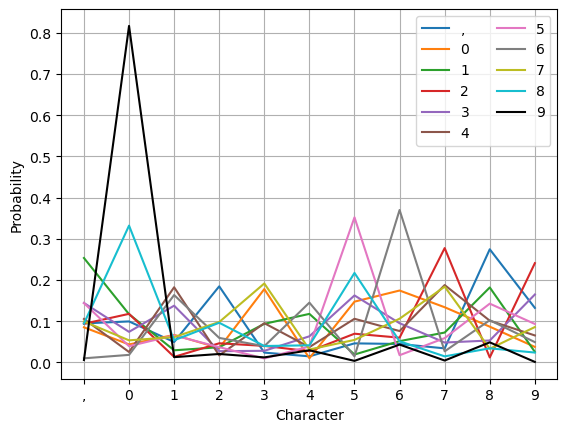

In [30]:
import matplotlib.pyplot as plt
p = plt.plot(next(bigram_model.embedding.parameters()).softmax(-1).T.detach().numpy());
plt.grid();
plt.xticks(torch.arange(len(vocab)), vocab);
[line.set_label(v) for line, v in zip(p, vocab)]
p[-1].set_color('black')
plt.legend(ncol=2);
plt.xlabel('Character'); plt.ylabel('Probability');
#Each line corresponds to the probability of having the corresponding token of the legend after the token of the
#X axis.

## Training loop

With the data and the model, we're almost ready to do the training. We need to define a loss function and an optimiziation algorithm to update our model parameters.

As we have mentioned before, we wish to minimize the negative log-likelihood of the data with respect to the model. To do so, we use pytorch's [cross entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss).

In [31]:
def cross_entropy_loss(logits, targets):
    "Cross entropy loss flattening tensors"
    BS, T, H = logits.shape #(batch, seq_len, vocab_size)
    loss = F.cross_entropy(logits.view(BS*T, H), targets.view(-1)) #view is like a reshape
    return loss

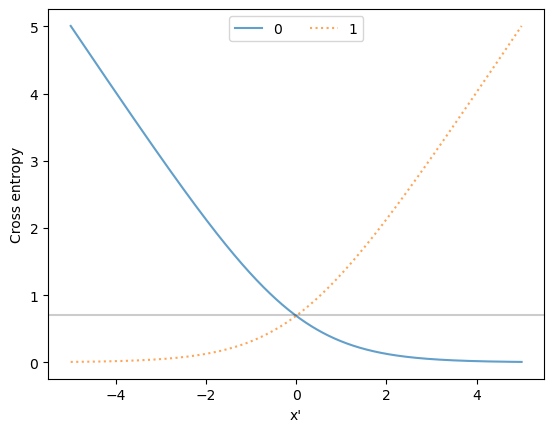

In [32]:
#This cell can help you to understand better how the cross entroypy works.
n_clases = 2
n_points = 2000
#x_ = F.sigmoid(torch.linspace(-5,5,n_points))
x_ = torch.linspace(-5,5,n_points)
x = torch.cat((x_[:,None], torch.zeros(n_points,n_clases-1)),dim=-1)
y = [F.cross_entropy(x,torch.tensor([i]).repeat(n_points), reduction='none') for i in range(n_clases)]
for i in range(n_clases):
    plt.plot(x_,y[i], '-' if i==0 else ':', label=i, alpha=0.7);
plt.legend(ncol=2);
plt.xlabel("x'");plt.ylabel('Cross entropy');
plt.axhline(2**.5*.5, c='k',alpha=0.2);

In [33]:
x

tensor([[-5.0000,  0.0000],
        [-4.9950,  0.0000],
        [-4.9900,  0.0000],
        ...,
        [ 4.9900,  0.0000],
        [ 4.9950,  0.0000],
        [ 5.0000,  0.0000]])

Then, as optimizer, we will use [Adam](https://arxiv.org/abs/1412.6980).

In [34]:
optimizer = torch.optim.AdamW(bigram_model.parameters(), lr=1e-3)

Now let's define the training loop.

In [35]:
batch_size = 32
seq_len = 24
train_steps = 3000

for i in range(train_steps):
    xb, yb = get_batch(data_train, batch_size, seq_len)
    
    optimizer.zero_grad()
    logits = bigram_model(xb) #forward
    loss = cross_entropy_loss(logits, yb)
    loss.backward()
    optimizer.step()
    
    if i%250==0: print(i, loss.item())

0 2.8520889282226562
250 2.817962408065796
500 2.63877272605896
750 2.542480707168579
1000 2.453030824661255
1250 2.4442989826202393
1500 2.4007160663604736
1750 2.3889739513397217
2000 2.4154319763183594
2250 2.38751482963562
2500 2.361750841140747
2750 2.3576667308807373


We will plug this into a function for later usage and estimate the loss on the validation set.

In [36]:
def train_model(steps, model, lr, batch_sz, seq_len):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    for i in range(steps):
        xb, yb = get_batch(data_train, batch_sz, seq_len)
        optimizer.zero_grad()
        logits = model(xb)
        loss = cross_entropy_loss(logits, yb)
        loss.backward()
        optimizer.step()
        if i % 200 == 0 or i == steps - 1:
            losses = estimate_loss(model, batch_sz, seq_len)
            print(f"Step {i}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    return model

@torch.no_grad()
def estimate_loss(model, batch_sz, seq_len, eval_iters=50):
    """Estimate losses for train and validation data sets.
    Adapted from https://github.com/karpathy/nanoGPT"""
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(data_train if split == 'train' else data_val,
                             batch_sz, seq_len)
            logits = model(X)
            loss = cross_entropy_loss(logits, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

Bigram models can't accomplish this example task. After every digit, all the other digits are equally likely to happen if we do not consider any further context. This model can only take advantage of the separator `,`. For instance, we know there will not be two consecutive separators and that the following number won't start with `0`.

We can see this in the first row of the embedding matrix.

In [37]:
#| code-fold: true
embedding_matrix = list(bigram_model.parameters())[0] 
embedding_matrix.softmax(-1)[0]

tensor([0.0154, 0.0162, 0.1208, 0.1214, 0.1154, 0.1074, 0.1180, 0.1185, 0.1200,
        0.1200, 0.0270], grad_fn=<SelectBackward0>)

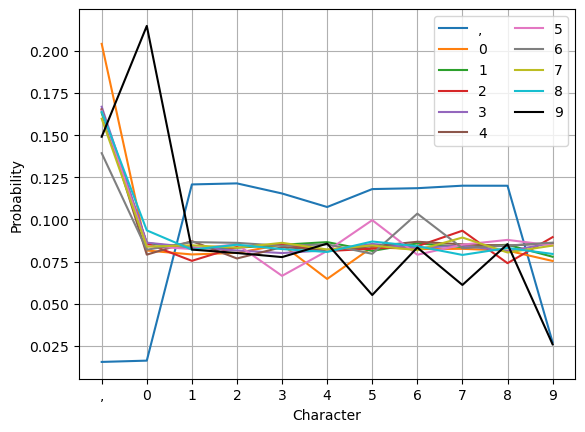

In [38]:
p = plt.plot(embedding_matrix.softmax(-1).T.detach().numpy());
plt.grid();
plt.xticks(torch.arange(len(vocab)), vocab);
[line.set_label(v) for line, v in zip(p, vocab)]
p[-1].set_color('black')
plt.legend(ncol=2);
plt.xlabel('Character'); plt.ylabel('Probability');

Let's generate some text.

In [39]:
context = torch.zeros((1, 1), dtype=torch.long).to(device)
tkn.decode(bigram_model.generate(context, 20)[0].tolist())

',896,347817506115,590'

In contrast to the previous example, we see the model has learned to not add consecutive separators, but the digits are still random. GPT time!

# GPT

Let's prepare a more advanced machine learning model that overcomes the limitations of our baseline. With the bigram model, the prediction of the next token only depends on the last token in our text corpus. Thus, the model works with very limited information about the context, and it would be much more beneficial to account for further past instances.

The extreme opposite case would be to account for all the previous existing text. This can be both overkill and unfeasible in terms of memory. For example, writing a book, we may not need to account for the whole thing to write the last sentence. Therefore, in modern architectures, we fix a maximum sequence length that we keep in memory to provide context for our prediction.

## Transformer

The architecture behind the [GPT language models](https://openai.com/blog/better-language-models/) is based on the transformer, depicted in @fig-transformer.

::: {#fig-transformer}
![](figures/transformer.png){width=60%}

Transformer schematic representation. 
:::

The transformer was introduced as an architecture for translation tasks with two main parts: the encoder (left) and the decoder (right). The decoder is the responsible part for generating the translated text and, thus, it is the language model bit of the whole architecture.

The transformer architecture relies heavily on self-attention mechanisms. Indeed, the original paper is called "[Attention is all you need](https://proceedings.neurips.cc/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html)". Unlike the bigram model, the transformer decoder can account for all the possible relationships between tokens in the past text to generate the new tokens.

## Causal self-attention

The key element in the transformer architecture is the self-attention layer. This allows our tokens in our text piece to "communicate with each other" in a fixed way:

- For every token, we compute three quantities: a key $\mathbf{k}$, a query $\mathbf{q}$ and a value $\mathbf{v}$.
- Then, tokens compare their query to the other tokens' keys.
- The resulting value for each token is the weighted average of all the values according to the query-key similarity.

We compute the similarity between keys and queries doing the dot product between the vectors. Then, to ensure the similarity weights are normalized, we apply the softmax activation function to all the dot products of the query of interest with all the keys. We can efficiently compute all of these with matrix multiplications:
$$\text{Attention}(Q,K,V) = \text{SoftMax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V\,$$
where $Q,K,V$ are the matrices containing the query, key and value vectors of every token in the text as rows. $d_k$ denotes the size of the key vector, and the normalization ensures the model is numerically stable. Without this normalization, even if $Q$ and $K$ have unit variance, the variance of their product is of the order of the head size $d_k$.

So far, we have not mentioned how to get the queries, keys and values from our tokens. We can choose any differentiable function. In the GPT architecture, they use a dense linear layer. 

In [40]:
class AttentionHead(nn.Module):
    "Self-attention head."
    def __init__(self, emb_sz, head_sz):
        super().__init__()
        self.key = nn.Linear(emb_sz, head_sz, bias=False)
        self.query = nn.Linear(emb_sz, head_sz, bias=False)
        self.value = nn.Linear(emb_sz, head_sz, bias=False)
    
    def forward(self, x):
        q = self.query(x) # (BS, T, H)
        k = self.key(x)
        v = self.value(x)
        
        w = q @ k.transpose(-2, -1) / math.sqrt(k.size(-1)) # Compute attention weights asscaled dot product of query and key, as in the expression above
        return w.softmax(-1) @ v # (BS, T, H)

This attention mechanism on its own, allows all the tokens to "see" each other at all times. This is what we would see in the transformer encoder, as all the source text in a translation task already exists. However, the transformer decoder can only attend to text as it is being generated. This means that, while we train it, we need to ensure that tokens cannot attend to what would be future innexistent ones.

This seems obvious because, at inference time, we clearly only have the text that is already generated. Nonetheless, during training, we sample full sequence chunks of a fixed sequence length. We can take the maximum advantage of this by training our model to generate new tokens for all the possible contexts available in this chunk, from a single initial token to all.

In [41]:
#| hide
torch.manual_seed(7);

In [42]:
batch_size, seq_len = 1, 8 
xb, yb = get_batch(data_train, batch_size, seq_len)

In [43]:
#| hide
print(f"For the sequence {xb[0]}:")
for i in range(1, xb.shape[-1]):
    print(f"When context is {xb[0, :i]}, the target is {xb[0, i]}")

For the sequence tensor([ 3,  0,  8,  8, 10,  1,  2,  4]):
When context is tensor([3]), the target is 0
When context is tensor([3, 0]), the target is 8
When context is tensor([3, 0, 8]), the target is 8
When context is tensor([3, 0, 8, 8]), the target is 10
When context is tensor([ 3,  0,  8,  8, 10]), the target is 1
When context is tensor([ 3,  0,  8,  8, 10,  1]), the target is 2
When context is tensor([ 3,  0,  8,  8, 10,  1,  2]), the target is 4


In [44]:
class CausalAttentionHead(nn.Module):
    "Masked self-attention head."
    def __init__(self, emb_sz, head_sz, seq_len, dropout=0.2):
        super().__init__()
        self.key = nn.Linear(emb_sz, head_sz, bias=False)
        self.query = nn.Linear(emb_sz, head_sz, bias=False)
        self.value = nn.Linear(emb_sz, head_sz, bias=False)
        #The mask should be a matrix with ones on and below the diagonal and zeros above the diagonal
        self.register_buffer('mask', torch.tril(torch.ones(seq_len, seq_len)))
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        q = self.query(x) # (BS, T, H)
        k = self.key(x)
        v = self.value(x)
        
        _, T, H = x.shape
        w = q @ k.transpose(-2, -1) *H**-0.5 # Compute attention weights asscaled dot product of query and key, as in the expression above
        w = w.masked_fill(self.mask[:T, :T] == 0, float('-inf'))
        return self.dropout(w.softmax(-1)) @ v # (BS, T, H)

::: {.callout-note}
This implementation works well. However, pytorch provides a `torch.nn.functional.scaled_dot_product_attention` that uses specialized CUDA kernels.
:::

Now that we have implemented the self-attention attention mechanism, let's make a first version of our GPT model. The model will have an embedding, an attention layer and a fully connected layer.

In [45]:
class GPT(nn.Module):
    "GPT-like model"
    def __init__(self, vocab_sz, emb_sz, head_sz, seq_len):
        super().__init__()
        self.seq_len = seq_len
        self.embedding = nn.Embedding(vocab_sz, emb_sz)
        self.attn = CausalAttentionHead(emb_sz, head_sz, seq_len)
        self.linear = nn.Linear(head_sz, vocab_sz)
        
    def forward(self, x):
        x = self.embedding(x) # Convert input tokens to embeddings
        x = self.attn(x) # Apply the attention mechanism
        return self.linear(x) # Apply a linear transformation to predict the next token
    
    @torch.no_grad()
    def generate(self, x, new_tkn):
        for _ in range(new_tkn):
            context = x[:, -self.seq_len:]
            logits = self.forward(context) # Compute the model prediction for the next token
            logits = logits[:, -1, :]
            probs = torch.softmax(logits, dim=-1) # Calculate the probabilities for each token to be the next one 
            new_tkn = torch.multinomial(probs, 1)
            x = torch.cat((x, new_tkn), dim=1) # Sample the new token based on the probabilities 
        return x

In [46]:
torch.manual_seed(7)
batch_size, seq_len = 64, 60
emb_sz, head_sz = 16, 16
gpt = GPT(vocab_size, emb_sz, head_sz, seq_len).to(device)

In [47]:
train_model(400, gpt, 1e-3, batch_size, seq_len) 

Step 0: train loss 2.4356, val loss 2.4098
Step 200: train loss 2.2224, val loss 2.3511
Step 399: train loss 2.1645, val loss 2.3704


GPT(
  (embedding): Embedding(11, 16)
  (attn): CausalAttentionHead(
    (key): Linear(in_features=16, out_features=16, bias=False)
    (query): Linear(in_features=16, out_features=16, bias=False)
    (value): Linear(in_features=16, out_features=16, bias=False)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (linear): Linear(in_features=16, out_features=11, bias=True)
)

In [48]:
context = torch.zeros((1, 1), dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 20)[0].tolist())

',366354304464,1669633'

Already with this basic transformer decoder, we reach a loss that is lower than the bigram model, but it is still not completing the task appropiately. Let's keep the work up!

## Positional encoding

With self-attention, our model can combine the information between all the tokens, but it has no notion about the relative distances between them. To solve this, we can provide our model with a positional encoding, as it is illustrated in @fig-transformer.

There are many different ways to provide the model with information about the token positions. In GPT, they use a positional embedding. This is the same as the vocabulary embedding with the difference that we will have as many rows in the embedding matrix as the maximum sequence length that we allow our model to process.

Let's implement it!

In [49]:
class GPT(nn.Module):
    "GPT-like model"
    def __init__(self, vocab_sz, emb_sz, head_sz, seq_len):
        super().__init__()
        self.seq_len = seq_len
        self.embedding_tkn = nn.Embedding(vocab_sz, emb_sz)
        self.embedding_pos = nn.Embedding(seq_len, emb_sz)
        self.attn = CausalAttentionHead(emb_sz, head_sz, seq_len)
        self.linear = nn.Linear(head_sz, vocab_sz)
        
    def forward(self, x):
        emb_tkn = self.embedding_tkn(x) # Convert input tokens to embeddings
        emb_pos = self.embedding_pos(torch.arange(x.size(1),device=x.device)) #Tensor with the positional encoding
        x = emb_tkn + emb_pos #SUm the token embedding and the positional encoding
        #Complete Sum the embedding and the positional encoding vectors
        x = self.attn(x) #Perform the attention
        return self.linear(x) #Apply a linear transformation 
    
    @torch.no_grad()
    def generate(self, x, new_tkn):
        for _ in range(new_tkn):
            context = x[:, -self.seq_len:]
            logits = self.forward(context) #model prediction for the next token
            logits = logits[:, -1, :]
            probs = torch.softmax(logits, dim=-1) #probabilities for each token to be the next one
            new_tkn = torch.multinomial(probs, 1) #Sample the new token based on the probabilities 
            x = torch.cat((x, new_tkn), dim=1)  #append the new token to the input sequence
        return x

In [50]:
torch.manual_seed(7)
batch_size, seq_len = 64, 60
emb_sz, head_sz = 16, 16
gpt = GPT(vocab_size, emb_sz, head_sz, seq_len).to(device)

In [51]:
train_model(1000, gpt, 5e-4, batch_size, seq_len) 

Step 0: train loss 2.4211, val loss 2.4755
Step 200: train loss 2.3014, val loss 2.4022
Step 400: train loss 2.1183, val loss 2.2653
Step 600: train loss 1.7449, val loss 1.8192
Step 800: train loss 1.4249, val loss 1.4024
Step 999: train loss 1.2994, val loss 1.1876


GPT(
  (embedding_tkn): Embedding(11, 16)
  (embedding_pos): Embedding(60, 16)
  (attn): CausalAttentionHead(
    (key): Linear(in_features=16, out_features=16, bias=False)
    (query): Linear(in_features=16, out_features=16, bias=False)
    (value): Linear(in_features=16, out_features=16, bias=False)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (linear): Linear(in_features=16, out_features=11, bias=True)
)

In [52]:
context = torch.ones((1, 1), dtype=torch.long).to(device)
gpt.eval()
tkn.decode(gpt.generate(context, 20)[0].tolist())

'002363201231340533834'

We have significantly reduced the loss, but it actually seems to do worse!

## Multi-head attention

So far, we have only used a single attention head in our model. In the GPT architecture, we use multi-head attention which consists of running various independent. Then, we concatenate the output of the different heads and project the resulting feature vectors to the original embedding size.

In [53]:
class MultiHeadAttention(nn.Module):
    "Multiple parallel self-attention heads."

    def __init__(self, num_heads, emb_sz, head_sz, seq_len):
        super().__init__()
        self.heads = nn.ModuleList([CausalAttentionHead(emb_sz, head_sz, seq_len)
                                    for _ in range(num_heads)]) #this way, we are creating a list of attention heads
        self.linear = nn.Linear(head_sz*num_heads, emb_sz)

    def forward(self, x):
        x = torch.cat([head(x) for head in self.heads], dim=-1)
        x = self.linear(x)
        return x

Usually, we take the embedding size and divide it by the number of heads to have better control of the matrix sizes within our model.

::: {.callout-note}
Here, we have implemented the heads sequentially instead of in parallel. There is a much faster way to compute all the attention heads at once. The tensor dimensions in the self-attention module are `[BS, T, E]`, where `E` denotes the embedding size. Since all the opperations are carried over the last two dimensions, if we reshape the Q, K, V tensors to `[BS, NH, T, HS]`, where `NH` and `HS` denote the number of heads and head size, respectively, we can compute the self-attention for all the heads at once. 
:::

In [54]:
import torch
torch.arange(7)

tensor([0, 1, 2, 3, 4, 5, 6])

In [55]:
class GPT(nn.Module):
    "GPT-like model"
    def __init__(self, vocab_sz, emb_sz, n_head, seq_len):
        super().__init__()
        self.seq_len = seq_len
        self.embedding_tkn = nn.Embedding(vocab_sz, emb_sz)
        self.embedding_pos = nn.Embedding(seq_len, emb_sz)
        head_sz = emb_sz // n_head
        self.attn = MultiHeadAttention(n_head, emb_sz, head_sz, seq_len)
        self.linear = nn.Linear(emb_sz, vocab_sz)
        
    def forward(self, x):
        emb_tkn = self.embedding_tkn(x) #Convert input tokens to embeddings
        emb_pos =self.embedding_pos(torch.arange(x.size(1),device=x.device)) #Perfomr the positional encoding (using indexes without sinus or cosinus)
        x = emb_tkn + emb_pos #Sum the embedding and the positional encoding vectors
        x = self.attn(x) # Perform the attention
        return self.linear(x) #Perform the linear transformation
    
    def generate(self, x, new_tkn):
        for _ in range(new_tkn):
            context = x[:, -self.seq_len:]
            logits = self.forward(context) #Complete Compute the model prediction 
            logits = logits[:, -1, :]
            probs = torch.softmax(logits,dim=-1) #Calculate the probabilities
            new_tkn = torch.multinomial(probs, 1) #Sample the new token
            x = torch.cat((x, new_tkn), dim=1) #Add the predicted token to the context
        return x

In [56]:
torch.manual_seed(7)
batch_size, seq_len = 64, 60
emb_sz, n_head = 16, 2
gpt = GPT(vocab_size, emb_sz, n_head, seq_len).to(device)

In [57]:
gpt = train_model(5000, gpt, 2e-4, batch_size, seq_len) 

Step 0: train loss 2.4112, val loss 2.4376
Step 200: train loss 2.3590, val loss 2.3887
Step 400: train loss 2.3115, val loss 2.3733
Step 600: train loss 2.2514, val loss 2.3853
Step 800: train loss 2.1956, val loss 2.3725
Step 1000: train loss 2.1238, val loss 2.3172
Step 1200: train loss 2.0328, val loss 2.2091
Step 1400: train loss 1.9273, val loss 2.0807
Step 1600: train loss 1.7949, val loss 1.9131
Step 1800: train loss 1.6563, val loss 1.7363
Step 2000: train loss 1.5364, val loss 1.5773
Step 2200: train loss 1.4709, val loss 1.4665
Step 2400: train loss 1.3891, val loss 1.3732
Step 2600: train loss 1.3363, val loss 1.2990
Step 2800: train loss 1.2875, val loss 1.2426
Step 3000: train loss 1.2579, val loss 1.2037
Step 3200: train loss 1.2372, val loss 1.1677
Step 3400: train loss 1.2157, val loss 1.1331
Step 3600: train loss 1.2010, val loss 1.1085
Step 3800: train loss 1.1839, val loss 1.0823
Step 4000: train loss 1.1634, val loss 1.0627
Step 4200: train loss 1.1646, val loss 1.

In [58]:
context = torch.ones((1, 1), dtype=torch.long).to(device)
gpt.eval()
tkn.decode(gpt.generate(context, 20)[0].tolist())

'000000000015040000000'

Technically, this generation is not wrong. Let's provide it with a bit of extra context.

In [59]:
context = torch.tensor([[3, 4, 4, 4, 0, 3, 4, 4, 5, 0]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 40).tolist()[0])

'2333,2334,7,233337,333147,233325,333325,333337,333'

## Feedforward

In the transformer architecture, we find multi-head attention layers that are followed by feedforward parts. These two main parts constitute the main body of a repeating block that we can then stack several times.

With the self-attention, we had tokens exchanging information. With the feedforward part, we let the tokens elaborate on this information.

Let's implement the feedforward bit of the network. It is a multi-layer perceptron with a single hidden layer.

In [60]:
class FeedForward(nn.Module):
    def __init__(self, emb_sz, dropout=0.2):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(emb_sz, 4*emb_sz),
                                    nn.GELU(),
                                    nn.Linear(4*emb_sz, emb_sz),
                                    nn.Dropout(dropout))

    def forward(self, x):
        return self.layers(x)

## Decoder block

We grow our network by stacking decoder blocks. These have an initial self-attention part followed by a feedforward part. Concatenating blocks, we alternate between both, resulting in a combination of token communication and local computation.

There are two main key elements in the decoder block that we have not implemented yet. These are the residual paths and the [layer normalization](https://arxiv.org/abs/1607.06450).

::: {.callout-note}
Beware that in the GPT architecture, the normalization layers go **before** the self-attention and feedforward layers. This is an enhancement with respect to the original transformer architecture from @fig-transformer.
:::

In [61]:
class DecoderBlock(nn.Module):
    def __init__(self, emb_sz, n_heads, seq_len):
        super().__init__()
        self.norm_1 = nn.LayerNorm(emb_sz)
        head_sz = emb_sz // n_heads
        self.heads = MultiHeadAttention(n_heads, emb_sz, head_sz, seq_len)
        self.norm_2 = nn.LayerNorm(emb_sz)
        self.ffw = FeedForward(emb_sz)
        
    def forward(self, x):
        x = x + self.heads(self.norm_1(x)) #Normalize and apply the MultiHeadAttention network
        x = x + self.ffw(self.norm_2(x)) #Normalize and apply the FeedForward network
        return x

Now we can rewrite our GPT models stacking a few blocks together.

In [62]:
class GPT(nn.Module):
    "GPT-like model"
    def __init__(self, vocab_sz, emb_sz, n_blocks, n_heads, seq_len):
        super().__init__()
        self.seq_len = seq_len
        self.embedding_tkn = nn.Embedding(vocab_sz, emb_sz)
        self.embedding_pos = nn.Embedding(seq_len, emb_sz)
        self.blocks = nn.Sequential(*[DecoderBlock(emb_sz, n_heads, seq_len)
                                      for _ in range(n_blocks)])
        self.layer_norm = nn.LayerNorm(emb_sz)
        self.linear = nn.Linear(emb_sz, vocab_sz)
        
    def forward(self, x):
        emb_tkn = self.embedding_tkn(x) #perform the token embedding
        emb_pos = self.embedding_pos(torch.arange(x.size(1),device=x.device)) #perform the positional encoding (using indexes without sinus or cosinus)
        x = emb_tkn + emb_pos #Sum the embedding and the positional encoding vectors
        x = self.blocks(x)#Use the stacked blocks
        return self.linear(self.layer_norm(x))
    
    def generate(self, x, new_tkn):
        for _ in range(new_tkn):
            context = x[:, -self.seq_len:]
            logits = self.forward(context) #model prediction for the next token
            logits = logits[:, -1, :]
            probs =  torch.softmax(logits,dim=-1) #Calculate the probabilities
            new_tkn = torch.multinomial(probs, 1) #Sample the new token
            x = torch.cat((x, new_tkn), dim=1) # Add the predicted token to the context
        return x

In [63]:
torch.manual_seed(7)
batch_size, seq_len = 64, 60
emb_sz, n_blocks, n_heads = 16, 3, 2
gpt = GPT(vocab_size, emb_sz, n_blocks, n_heads, seq_len).to(device)

In [64]:
gpt = train_model(5000, gpt, 2e-4, batch_size, seq_len) 

Step 0: train loss 2.5403, val loss 2.5457
Step 200: train loss 2.3754, val loss 2.4501
Step 400: train loss 2.3133, val loss 2.4111
Step 600: train loss 2.2467, val loss 2.3663
Step 800: train loss 2.2034, val loss 2.3604
Step 1000: train loss 2.1698, val loss 2.3490
Step 1200: train loss 2.1300, val loss 2.3386
Step 1400: train loss 2.0983, val loss 2.3018
Step 1600: train loss 2.0711, val loss 2.3002
Step 1800: train loss 2.0472, val loss 2.2857
Step 2000: train loss 2.0265, val loss 2.2673
Step 2200: train loss 1.9939, val loss 2.2277
Step 2400: train loss 1.9421, val loss 2.1722
Step 2600: train loss 1.8677, val loss 2.0713
Step 2800: train loss 1.7912, val loss 1.9934
Step 3000: train loss 1.7215, val loss 1.8885
Step 3200: train loss 1.6289, val loss 1.7815
Step 3400: train loss 1.5090, val loss 1.6235
Step 3600: train loss 1.3721, val loss 1.4254
Step 3800: train loss 1.2544, val loss 1.2324
Step 4000: train loss 1.1559, val loss 1.1051
Step 4200: train loss 1.1217, val loss 1.

In [65]:
context = torch.ones((1, 1), dtype=torch.long).to(device)
gpt.eval()
tkn.decode(gpt.generate(context, 20)[0].tolist())

'0,71,8,3098,8,309,28,'

Technically, this generation is not wrong. Let's provide it with a bit of extra context.

In [66]:
context = torch.tensor([[3, 4, 4, 4, 0, 3, 4, 4, 5, 0]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 40).tolist()[0])

'2333,2334,2,2333,3,2334,3,2334,2,2334,2,2334,2,233'

It's not perfect, but we're getting there.

## Go big or go home

Let's see how far we can push the model. As we grow the newtork, it is essential that we add some regularization, such as dropout.

In [67]:
torch.manual_seed(7)
batch_size, seq_len = 64, 60
emb_sz, n_blocks, n_heads = 64, 4, 8
gpt = GPT(vocab_size, emb_sz, n_blocks, n_heads, seq_len).to(device)

In [68]:
gpt = train_model(10000, gpt, 1e-4, batch_size, seq_len) 

Step 0: train loss 2.5042, val loss 2.4849
Step 200: train loss 2.1703, val loss 2.3708
Step 400: train loss 2.0365, val loss 2.2850
Step 600: train loss 1.9557, val loss 2.2185
Step 800: train loss 1.8703, val loss 2.1451
Step 1000: train loss 1.7773, val loss 2.0686
Step 1200: train loss 1.5781, val loss 1.8507
Step 1400: train loss 1.0135, val loss 1.0214
Step 1600: train loss 0.8443, val loss 0.7239
Step 1800: train loss 0.7406, val loss 0.6069
Step 2000: train loss 0.5954, val loss 0.4802
Step 2200: train loss 0.4928, val loss 0.3872
Step 2400: train loss 0.4275, val loss 0.3297
Step 2600: train loss 0.3901, val loss 0.2971
Step 2800: train loss 0.3538, val loss 0.2817
Step 3000: train loss 0.3345, val loss 0.2727
Step 3200: train loss 0.3121, val loss 0.2693
Step 3400: train loss 0.2920, val loss 0.2644
Step 3600: train loss 0.2833, val loss 0.2615
Step 3800: train loss 0.2810, val loss 0.2584
Step 4000: train loss 0.2685, val loss 0.2569
Step 4200: train loss 0.2654, val loss 0.

In [69]:
context = torch.ones((1, 1), dtype=torch.long).to(device)
gpt.eval()
tkn.decode(gpt.generate(context, 20)[0].tolist())

'00556,400557,400558,4'

This model seems to know what it's doing. Let's try with a different context.

In [70]:
context = torch.tensor([[5, 5, 0, 4, 9, 5, 6]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 20)[0].tolist())

'44,384545,384546,384547,384'

In [71]:
context = torch.tensor([[0]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 20)[0].tolist())

',869779,869780,869781'

Promising. Let's see more!

In [72]:
context = torch.tensor([[0]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 80)[0].tolist())

',835369,835370,835371,835372,835373,835374,835375,835376,835377,835378,835379,835'

Let's try again.

In [73]:
context = torch.tensor([[0]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 80)[0].tolist())

',938942,938943,938944,938945,938946,938947,938948,938949,938950,938951,938952,938'

In [77]:
context = torch.tensor([[2],[0],[3],[0]], dtype=torch.long).to(device)
tkn.decode(gpt.generate(context, 80)[0].tolist())

'173431,173432,173433,173434,173435,173436,173437,173438,173439,173440,173441,1734'

Flawless. This model rocks!